# State Detection Visualization
In this notebook, we visualize predicted state detections.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

from src.utils import load_tssb_datasets, load_has_datasets, load_datasets
import matplotlib.pyplot as plt
import seaborn as sns

from src.visualization import plot_state_detection

sns.set_theme()
sns.set_color_codes()

import os


We start by loading a data set and the competitor results.

In [3]:
dataset = "HAS"
competitor = "CLaP"

In [4]:
if dataset == "TSSB":
    df_data = load_tssb_datasets()
elif dataset == "HAS":
    df_data = load_has_datasets()
else:
    df_data = load_datasets(dataset)
    
df_data

/Users/ermshaua/Documents/Git/public/classification-label-profile/src/utils.py:215: RuntimeWarning: invalid value encountered in divide
  channel = np.true_divide(channel - channel.min(), channel.max() - channel.min())


,dataset,window_size,change_points,labels,time_series
125,outdoor_subject4_routine1 (id237),50,"[460, 985, 6622, 7535, 8435, 9335]","[1, 3, 0, 5, 2, 5, 4]","[[0.5056188639551192, 0.6829380789483799, 0.71..."
140,outdoor_subject7_routine1 (id85),50,"[5025, 6150, 6750]","[0, 2, 1, 2]","[[0.6666666666666667, 0.9265584568336863, 0.07..."
93,indoor_subject7_routine3 (id238),50,[412],"[0, 1]","[[0.43643672803542294, 0.4453103604766711, 0.4..."
52,indoor_subject4_routine2 (id21),50,"[1927, 2627, 4790, 8058, 9746]","[0, 5, 1, 4, 3, 2]","[[0.6895521667501464, 0.7056605651166775, 0.62..."
221,outdoor_subject6_routine3 (id191),50,[],[0],"[[0.4022060024166421, 0.2668045026418561, 0.49..."
150,outdoor_subject1_routine2 (id173),50,"[280, 477, 697, 1252, 4184]","[2, 1, 0, 1, 0, 1]","[[0.5007491197842535, 0.48528319059148095, 0.5..."
176,outdoor_subject5_routine2 (id54),50,"[1946, 2761, 15228, 15880, 20046, 21338, 24811...","[0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1]","[[0.1890565621857356, 0.5155507356977413, 0.72..."
231,outdoor_subject7_routine3 (id120),50,"[1379, 1633]","[0, 2, 1]","[[0.8489319948675371, 0.5493281834244155, 0.15..."
103,indoor_subject8_routine3 (id134),50,"[484, 1473, 1945, 2961]","[0, 2, 0, 1, 0]","[[0.5497783485934459, 0.5627172653534183, 0.49..."
66,indoor_subject3_routine3 (id9),50,"[1069, 1502]","[2, 0, 1]","[[0.39943447723166026, 0.5958251800156158, 0.4..."


In [5]:
np_cols = ["true_cps", "found_cps", "found_labels"]

converters = {
    col: lambda val: np.array([]) if len(val) == 0 else np.array(eval(val)) for col
    in np_cols}

df_scores = pd.read_csv(f"../../experiments/state_detection/{dataset}_{competitor}.csv.gz", converters=converters)
df_scores

,dataset,true_cps,found_cps,found_labels,f1_score,covering_score,ami
0,outdoor_subject4_routine1 (id237),"[460, 985, 6622, 7535, 8435, 9335]","[1122, 7546, 7946, 8420, 9388, 9831]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.714,0.787,0.754
1,outdoor_subject7_routine1 (id85),"[5025, 6150, 6750]","[743, 4988, 6068, 6713]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.667,0.866,0.711
2,indoor_subject7_routine3 (id238),[412],[402],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.987,0.941
3,indoor_subject4_routine2 (id21),"[1927, 2627, 4790, 8058, 9746]","[1432, 2063, 2565, 3000, 3736, 4163, 8294]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.286,0.626,0.653
4,outdoor_subject6_routine3 (id191),[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000
5,outdoor_subject1_routine2 (id173),"[280, 477, 697, 1252, 4184]",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.286,0.461,0.000
6,outdoor_subject5_routine2 (id54),"[1946, 2761, 15228, 15880, 20046, 21338, 24811...","[360, 1723, 3234, 5777, 14725]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.222,0.533,0.143
7,outdoor_subject7_routine3 (id120),"[1379, 1633]",[1542],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.400,0.848,0.789
8,indoor_subject8_routine3 (id134),"[484, 1473, 1945, 2961]",[1480],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.571,0.457,0.470
9,indoor_subject3_routine3 (id9),"[1069, 1502]","[1047, 1555]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.667,0.945,0.891


Now, we plot the state detection for a given time series.

<Axes: >

<Figure size 640x480 with 0 Axes>

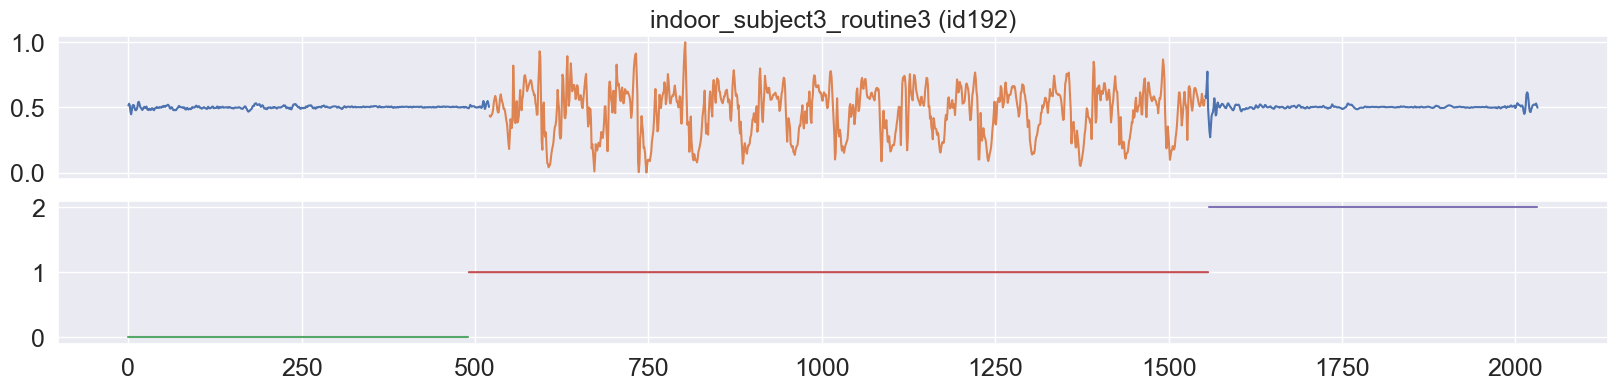

In [8]:
idx = 40
data_row = df_data.iloc[idx]

plot_state_detection(data_row.dataset, data_row.time_series[:,:1], df_scores.iloc[idx].found_labels, change_points=data_row.change_points, labels=data_row.labels)